In [ ]:
# Follow-along code adapted from the video at https://youtu.be/VMj-3S1tku0

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x): 
    return 3*x**2 - 4*x+5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange (-5, 5, 0.25)
print (xs)

ys = f(xs)
print (ys)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


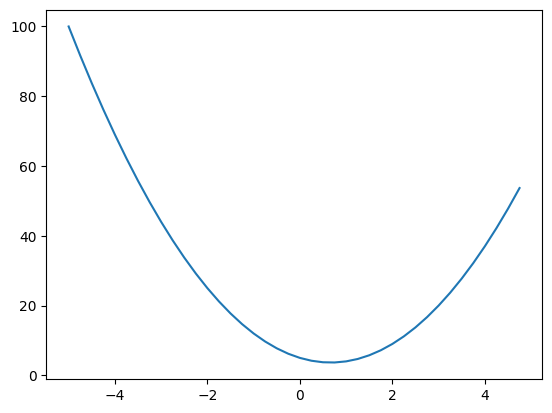

In [5]:
plt.plot(xs, ys)

In [6]:
x=2/3
h=0.0001
print ((f(x+h)-f(x))/h)

0.0002999999981767587


d1= 4.0
d2= 3.999699999999999
Slope1= -3.000000000010772
d1= 4.0
d2= 3.99990001
Slope2= -0.9998999999982772
d1= 4.0
d2= 4.00000001
Slope3= 9.99999993922529e-05


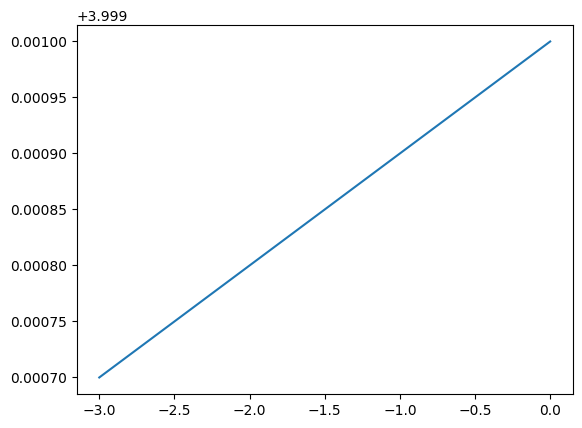

In [7]:
h=0.0001
slopes = [0,1,2]
ds = [0,1,2]

#inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
ds[0] = a*b + c

slopes[0] = (ds[0]-d1)/h

print ("d1=", d1)
print ("d2=", ds[0])
print ("Slope1=", slopes[0])

b += h
ds[1] = a*b + c

slopes[1]  = (ds[1]-d1)/h
print ("d1=", d1)
print ("d2=", ds[1])
print ("Slope2=", slopes[1])

c+= h
ds[2] = a*b + c

slopes[2]  = (ds[2]-d1)/h
print ("d1=", d1)
print ("d2=", ds[2])
print ("Slope3=", slopes[2])

plt.plot(slopes,ds)



In [8]:
class Value:
    """ stores a single scalar value and its gradient """
    
    def __init__(self, data,_children=(), _op=""):
       self.data = data
       self._prev = set(_children)
       self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')


In [9]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = Value(2.0)
e = Value(2.0)
f = (a * b + c * d)/e
print (f, f._prev, f._op)

Value(data=7.0) {Value(data=2.0), Value(data=14.0)} /


In [10]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root,format='svg', rankdir='LR'):
    
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f }" % (n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

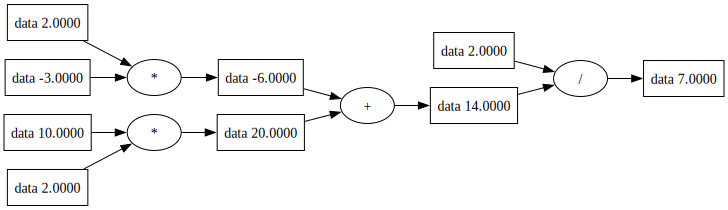

In [11]:
draw_dot(f)